<a href="https://colab.research.google.com/github/stbalaji/AIForBusiness/blob/main/06AIForBusiness_NLPEndToEnd_USAirlineSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI For Business
## Module : Natural Language Processing - End to end Example

### Lesson 01
### Use NLP Techniques (clustering and classification) to help understand end to end NLP Based AI Solutions
### Problem: US Airline Twitter Data Analysis to understand Consumer Sentiments - Kaggle Dataset

## Key Steps and Learnings Expected
1.   Introduction,  Setup
2.   Load a Clean Dataset
3.   Text Processing and Analysis
4.   Text Representation - Encoding
5.   Text Representation - Bag of words
6.   Text Representation - Bag of N-Grams
7.   Text Representation - TFIDF
8.   Word Embeddings - Word2Vec, Glove.
9.   Visualize Embeddings






# STEP 1 : Understanding of the Problem Domain and Acquire Data

*   We will use a Dataset for 'Twitter US Airline Sentiment'. A sentiment analysis job about the problems of each major U.S. airline.
*   Use Data provide by https://www.kaggle.com/code/prasadmenonsrees/project-nlp-sentiment-analysis-twitter-us-air
*   Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

## Download the datafile from Source

```
# This is formatted as code
```


Students are encouraged to Download the datafile from Kaggle Site directly.
URL : https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
File : Tweets.csv (3.42 MB) | 15 Columns

# S1 : Data Analysis

In [3]:
df_clean_data = pd.read_csv("Tweets.csv")
df = df_clean_data.copy()

In [ ]:
# Note basic observations

print(tweet_data.shape)
df.info()
# Few observations : 14640 Tweets, includes both negative sentiment and positive reason. Text is key column
# Many values are nulls - negativereason (9178),

In [ ]:
df.dtypes

In [9]:
# keycols =['airline','text', 'tweet_id', 'airline_sentiment']
keycols =['airline','text', 'airline_sentiment', 'airline_sentiment_confidence']
df[keycols].head(5)

,airline,text,airline_sentiment,airline_sentiment_confidence
0,Virgin America,@VirginAmerica What @dhepburn said.,neutral,1.0000
1,Virgin America,@VirginAmerica plus you've added commercials t...,positive,0.3486
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837
3,Virgin America,@VirginAmerica it's really aggressive to blast...,negative,1.0000
4,Virgin America,@VirginAmerica and it's a really big bad thing...,negative,1.0000


### Check for Duplicates and drop duplicate values

In [28]:
df_duplicates = df[df.duplicated()]
print(f"Count of Duplicate Rows : {df_duplicates.shape}\n")
print(df_duplicates[keycols].head(5))

Count of Duplicate Rows : (0, 15)

Empty DataFrame
Columns: [airline, text, airline_sentiment, airline_sentiment_confidence]
Index: []


In [27]:
df.drop_duplicates(keep=False,inplace=True)

### Visualize Data

<Axes: xlabel='airline_sentiment', ylabel='count'>

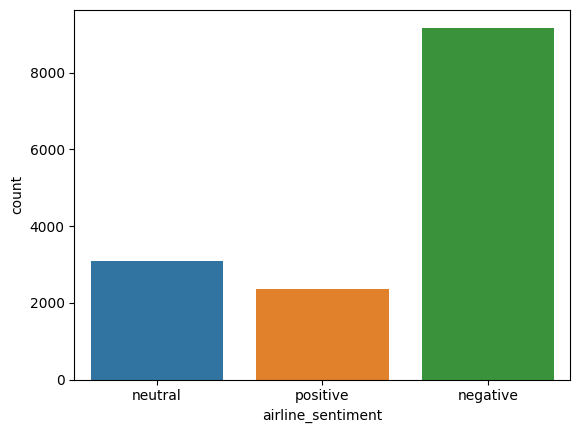

In [12]:
sns.countplot(x = "airline_sentiment", data = df)  # Mostly Negative Sentitments

### Data Preparation and Cleanup

In [ ]:
# Note we do keep a dataframe with full dataset in case required later.

cols_not_of_use_in_modeling = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

df = df.drop(cols_not_of_use_in_modeling, axis = 1)

#  S2 : Text Data Representation